In [ ]:
!pip3 install sklearn

In [16]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [13]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2


In [15]:
svm.predict_proba(X_train)[:3]

array([[0.00870578, 0.04464185, 0.94665237],
       [0.00915106, 0.85733641, 0.13351254],
       [0.96515998, 0.02375085, 0.01108917]])

In [37]:
X_train.shape

(120, 4)

In [44]:
class TestModel:
    def __init__(self, svm):
        self.svm = svm

    def predict(self, X):
        print(type(X))
        print(X.shape)
        print(X[:3])
        print('======')
        #X['sepal length (cm)'] = 2* X['sepal length (cm)']
        return self.svm.predict_proba(X)

In [45]:
model = TestModel(svm)

In [49]:
explainer = shap.KernelExplainer(model.predict, X_train.to_numpy())
#shap_values = explainer.shap_values(X_test, nsamples=100)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<class 'numpy.ndarray'>
(120, 4)
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]]


In [50]:
'''
INPUT : array-or-dataframe (:, features)
OUTPUT : arrayy (:, class)
----------------------------------
INPUT -> model-dataframe -> din-model -> OUTPUT
'''

/bin/sh: 1: history: not found


In [54]:
!git clone https://gitlab.data.gamania.com/datascience/dataproc-metrics-calculator.git

Cloning into 'dataproc-metrics-calculator'...
fatal: unable to access 'https://gitlab.data.gamania.com/datascience/dataproc-metrics-calculator.git/': The requested URL returned error: 403


In [55]:
!git clone https://github.com/ChengHSUHSU/gama_backup.git

Cloning into 'gama_backup'...
remote: Enumerating objects: 580, done.
remote: Counting objects: 100% (580/580), done.
remote: Compressing objects: 100% (308/308), done.
remote: Total 580 (delta 237), reused 580 (delta 237), pack-reused 0
Receiving objects: 100% (580/580), 15.30 MiB | 29.45 MiB/s, done.
Resolving deltas: 100% (237/237), done.


In [56]:
!ls


bin	   dev		hadoop	lib32	lost+found  opt   run	sys  var
boot	   etc		home	lib64	media	    proc  sbin	tmp  work_dev
copyright  gama_backup	lib	libx32	mnt	    root  srv	usr


In [1]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

In [51]:
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.to_numpy(), link="logit")

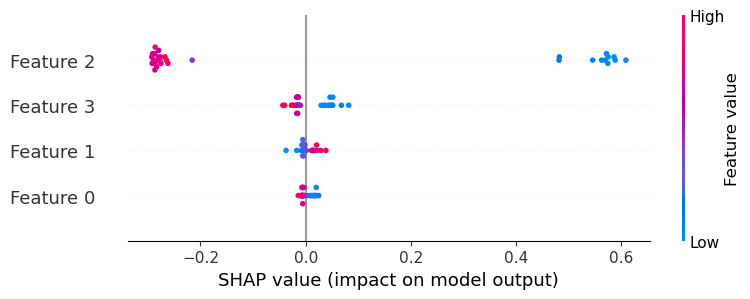

In [52]:
shap.summary_plot(shap_values[0], X_test.to_numpy())

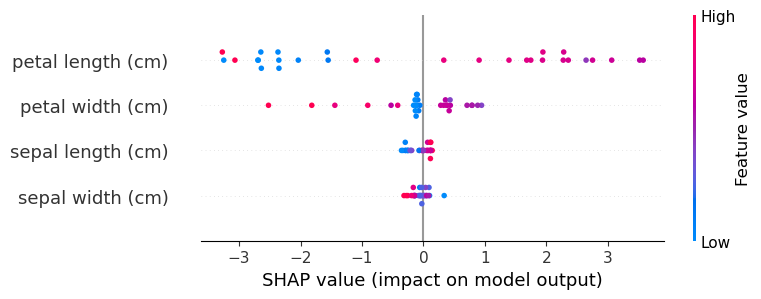

In [6]:
shap.summary_plot(shap_values[1], X_test)

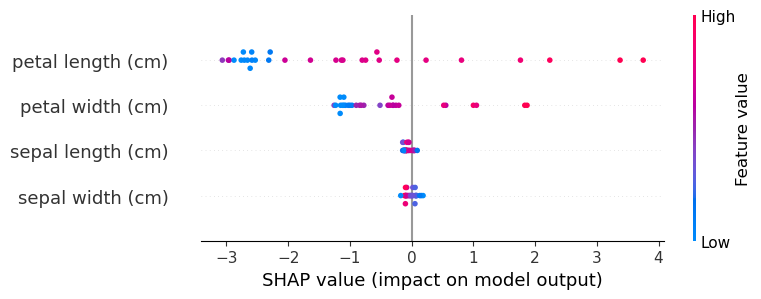

In [11]:
shap.summary_plot(shap_values[2], X_test)

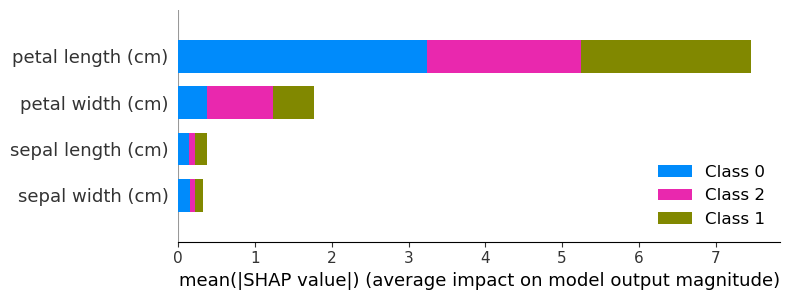

In [12]:
shap.summary_plot(shap_values, X_test)